In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud


In [5]:
df = pd.read_csv("/spam.csv")
print (df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


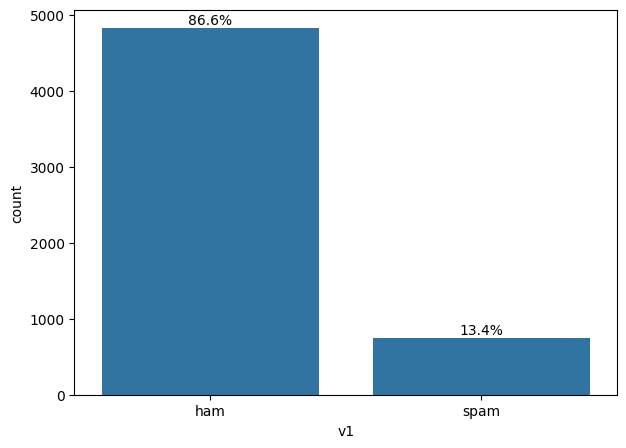

In [8]:
X = df.iloc[:, 1:2]
y = df.iloc[:, 0:1]
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="v1", data=df)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(X))
    x_countplot = p.get_x() + p.get_width()/2
    y_countplot = p.get_height()+ 50
    ax.annotate(percentage, (x_countplot, y_countplot), ha='center')
plt.show()

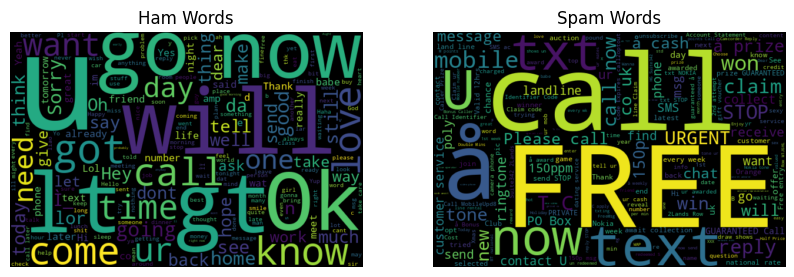

In [13]:
ham_words = ' '.join(df[df['v1'] == 'ham']['v2'])
spam_words = ' '.join(df[df['v1'] == 'spam']['v2'])

ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Words')

plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Words')

plt.show()


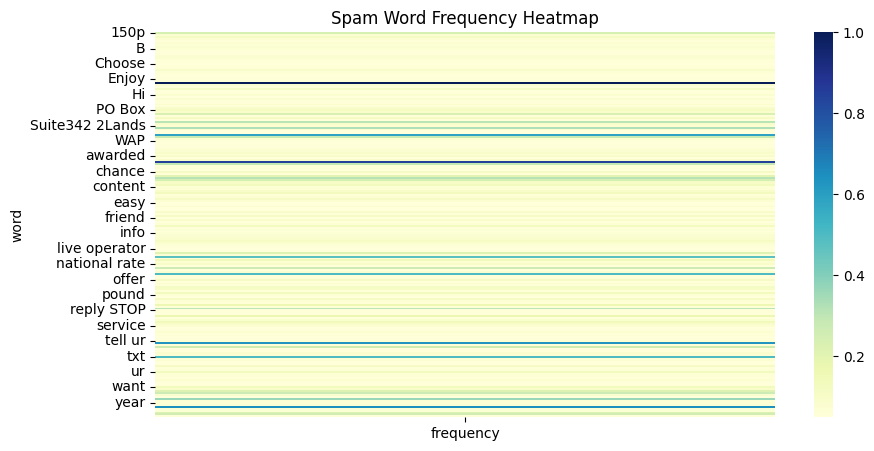

In [15]:
spam_words = ' '.join(df[df['v1'] == 'spam']['v2'])

spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)

wordcloud_df = pd.DataFrame(spam_wordcloud.words_.items(), columns=["word", "frequency"])

fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(pd.pivot_table(wordcloud_df, values="frequency", index="word", aggfunc=sum), cmap="YlGnBu")

plt.title("Spam Word Frequency Heatmap")
plt.show()


In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values.ravel(),
    y.values.ravel(),
    test_size=0.20,
    random_state=42)
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()


In [19]:
clf_method = KNeighborsClassifier()

clf_count_vectorizer = Pipeline([
     ('vectorizer', count_vectorizer),
     ('classifier', clf_method)
 ])

clf_count_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [28]:
y_train_pred_cvect = clf_count_vectorizer.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred_cvect):.3f}")
print(classification_report(y_train, y_train_pred_cvect))

Train Accuracy: 0.932
              precision    recall  f1-score   support

         ham       0.93      1.00      0.96      3860
        spam       1.00      0.49      0.66       597

    accuracy                           0.93      4457
   macro avg       0.96      0.74      0.81      4457
weighted avg       0.94      0.93      0.92      4457



In [29]:
y_test_pred_cvect = clf_count_vectorizer.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_cvect):.3f}")
print(classification_report(y_test, y_test_pred_cvect))

Test Accuracy: 0.919
              precision    recall  f1-score   support

         ham       0.91      1.00      0.96       965
        spam       1.00      0.40      0.57       150

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.76      1115
weighted avg       0.93      0.92      0.90      1115



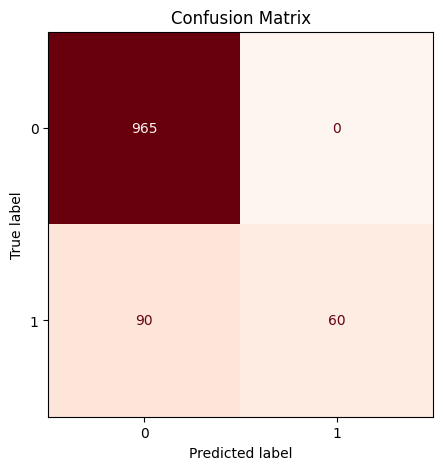

In [37]:
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_cvect))

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Confusion Matrix')
conf_mat_train.plot(cmap=plt.cm.Reds, ax=ax, colorbar=False);